In [237]:
## MP 573 Lecture 9: Sampling in N-D
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio

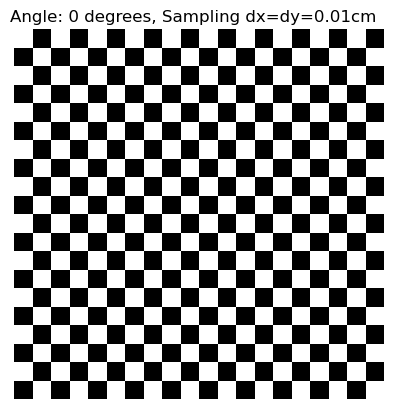

In [334]:
# Sampling example (tilted checkerboard)
import matplotlib.pyplot as plt
import numpy as np

def tilted_checkerboard(dx, tilt_angle):
    """
    Generates a tilted checkerboard pattern.

    Args:
        dx: the sample spacing
        tilt_angle: The angle of tilt in degrees (counter-clockwise).

    Returns:
        A numpy array representing the tilted checkerboard pattern.
    """

    # Create a meshgrid for x and y coordinates
    x, y = np.meshgrid(np.arange(-10,10,dx), np.arange(-10,10,dx))

    # Calculate the tilted coordinates
    theta = np.radians(tilt_angle)
    x_tilted = (x * np.cos(theta) - y * np.sin(theta))
    y_tilted = (x * np.sin(theta) + y * np.cos(theta))

    # Create the checkerboard pattern using modulo operation on the tilted coordinates
    cx = (((x_tilted % 2) // 1)== 0) - 0.5
    cy = (((y_tilted % 2) // 1)== 0) - 0.5
    checkerboard = (cx*cy >0).astype(float)

    return checkerboard

# Let us define the size of the array 
dx = 0.01
tilt_angle = 0
pattern = tilted_checkerboard(dx, tilt_angle)

# Display the pattern using matplotlib
plt.imshow( pattern , cmap='gray', interpolation='nearest')
plt.title(f"Angle: {tilt_angle} degrees, Sampling dx=dy={dx}cm  ")
plt.axis('off')
plt.show()


In [241]:
# MRI Example. 
# If data are not here, copy over
import os.path
check_file = os.path.isfile('data/brain_orig.mat')
if check_file == False:
  !wget https://github.com/dherarr/mp573/raw/master/data/brain_orig.mat?raw=true
  !mkdir data
  !mv brain_orig.mat\?raw\=true data/brain_orig.mat

# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_orig.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['im_mr']
sx = len(f)
sy = len(f[:])

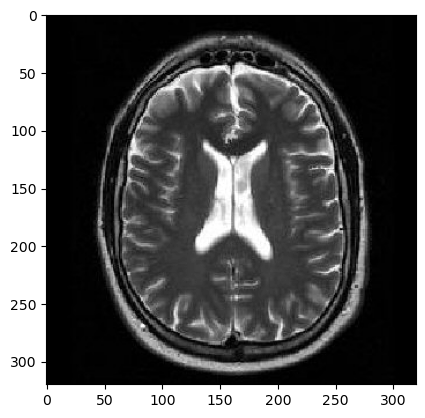

In [243]:
imgplot = plt.imshow(abs(f),cmap='gray')

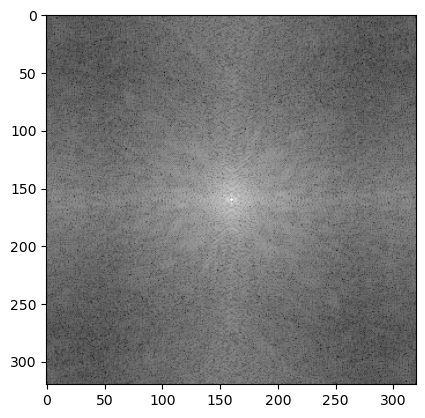

In [245]:
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
imgplot = plt.imshow(np.log(abs(fhat)),cmap='gray')

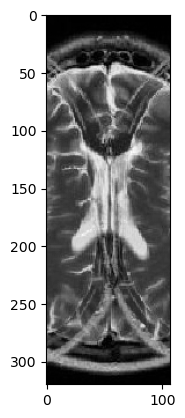

In [247]:
# Now subsample along R/L
SPACING = 3
f2 = np.concatenate((np.zeros((sx,10*sy)),f,np.zeros((sx,10*sy))),1)
fhat2 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f2)))
skip = int(np.round(21*SPACING))
fhat3 = fhat2[:,1::skip]
f3 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat3)))
imgplot = plt.imshow(abs(f3),cmap='gray')

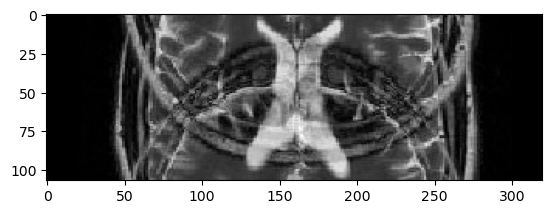

In [249]:
# Now subsample along A/P
SPACING = 3
f2 = np.concatenate((np.zeros((10*sx,sy)),f,np.zeros((10*sx,sy))),0)
fhat2 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f2)))
skip = int(np.round(21*SPACING))
fhat3 = fhat2[1::skip,:]
f3 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat3)))
imgplot = plt.imshow(abs(f3),cmap='gray')

## Q1: Nyquist sampling for a 2D rect 

Now we have a spatial-domain signal $f(x,y) = $rect$(x,y)$ (ie: a square-shaped signal that is equal to 1 when if both x and y are between -0.5 and 0.5 cm and is zero elsewhere). We would like to sample this signal in space such that we can recover it. What is the Nyquist sampling interval for this signal?

A: 0.01 cm along each dimension

B: 0.05 cm along each dimension

C: 1.0  cm along each dimension

D: There is no Nyquist sampling rate because this signal is not bandlimited (ie: its Fourier transform is not limited to a finite range of spatial frequencies)

## Q2: Nyquist sampling in the spatial domain

We have an image $f(x,y)$ with limited spatial frequencies (ie: bandlimited). Specifically, this image has bandwidth of $B_x cm^{-1}$ along the x dimension, and bandwidth of $B_y cm^{-1}$ along the y dimension, so the Fourier domain representation is zero outside of a rectangular region of size $B_x \times B_y$: 

$$\hat{f}(u,v) = 0 \hbox{ if } |u| \geq B_x/2 \hbox{ or } |v| \geq B_y/2$$ 

If we sample this image in the spatial domain, how close do the samples need to be along each dimension in order to fulfill the Nyquist criterion (ie: to avoid aliasing)? 

A: $\Delta x \leq 1/B_x \hbox{ , } \Delta y \leq 1/B_y$

B: $\Delta x \leq 10 \hbox{ , } \Delta y \leq 5$


C: $\Delta x \leq B_x \hbox{ , } \Delta y \leq B_y$


D: There's no Nyquist rate for this signal







